In [1]:
import pandas as pd

data = pd.read_csv('datas.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  240 non-null    object 
 1   likes                  240 non-null    object 
 2   views                  240 non-null    float64
 3   year                   240 non-null    float64
 4   month                  240 non-null    float64
 5   day                    240 non-null    float64
 6   script                 235 non-null    object 
 7   chennel                240 non-null    float64
 8   local                  240 non-null    object 
 9   restaurant_type        240 non-null    object 
 10  guest_info             240 non-null    object 
 11  food_scenes            240 non-null    float64
 12  eating_scenes          238 non-null    float64
 13  drinking_scene         240 non-null    float64
 14  restaurant_info_scene  239 non-null    float64
 15  conver

In [2]:
print(data.iloc[180])

title                    최자로드5 EP.16 | 힘 좋은 갯벌장어와 참복 코스 스페셜 (feat. 핫펠트,...
likes                                                                   1천
views                                                             189385.0
year                                                                2021.0
month                                                                 12.0
day                                                                    9.0
script                                                                  []
chennel                                                                1.0
local                                                               서울 서초구
restaurant_type                                                   돈까스·회·일식
guest_info                                                             연예인
food_scenes                                                            1.0
eating_scenes                                                          0.0
drinking_scene           

In [3]:
# import numpy as np
# rc = pd.read_csv('recover.csv',index_col=0)
# data = pd.merge(data,rc,how='left',left_on='title',right_on='title')
# print(data.columns)
# data['run_time'] = data.apply(lambda x:x['run_time_y'] if x['run_time_x'] != x['run_time_x'] else x['run_time_x'],axis=1)
# print(data['run_time'].iloc[20:40])
# data.drop(columns=['run_time_x','run_time_y'],inplace=True)
# print(data.columns)

In [4]:
def str_to_int(x):
    x = str(x).replace('만','0000').replace('천','000')
    if "." in x:
        x = x[:-1].replace('.','')
    x = x if x != 'NaN' else 0
    return int(x)

def like_to_count(data):
    data['likes'] = data['likes'].fillna(0).apply(str_to_int)
    return data

data = like_to_count(data)
print(data['likes'])

0      12000
1      10000
2      15000
3      10000
4       6900
       ...  
235     1300
236      672
237      710
238      802
239      924
Name: likes, Length: 240, dtype: int64


In [5]:
def to_sec(x):
    time = x.split(":")
    sec = int(time[0]) + int(time[1]) * 60 if len(time) > 1 else 0
    return int(sec)

def time_to_sec(data):
    data['run_time'] = data['run_time'].fillna('0').apply(to_sec)
    return data

data = time_to_sec(data)
print(data['run_time'])

0      1044
1      2007
2      2554
3      2974
4       687
       ... 
235    1293
236    1110
237    2132
238    2551
239     689
Name: run_time, Length: 240, dtype: int64


In [6]:
x = data.drop(columns=['title','views','script'])
y = data['views']
print(x.columns)

Index(['likes', 'year', 'month', 'day', 'chennel', 'local', 'restaurant_type',
       'guest_info', 'food_scenes', 'eating_scenes', 'drinking_scene',
       'restaurant_info_scene', 'conversation_scene', 'run_time'],
      dtype='object')


In [7]:
from sklearn.preprocessing import LabelEncoder

def label_encode(data):
    lbe = LabelEncoder()
    data['guest_info'] = lbe.fit_transform(data['guest_info'])
    data['restaurant_type'] = lbe.fit_transform(data['restaurant_type'])
    data['local'] = lbe.fit_transform(data['local'])
    return data

x = label_encode(x)
print(x['guest_info'].unique())
print(x['restaurant_type'].unique())
print(x['local'].unique())

[0 1 2]
[ 8  1 13  9  3  6 10 12  2  5 11  7  4  0]
[25  2 42 39 47 52 11 14 31 45 38 40 27 59 48 36 35 21 46 56 60  8 58  9
 24 37 54 33 44 43 41 34 28 20 23 50 51 30 18 17 53 19 29 12 32 26 57 16
 49 55 15 22  6  1  3  0  4  5 10  7 13]


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
def model(x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)

    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)

    print(rfr.score(x_test,y_test))
    print(rfr.feature_importances_)
model(x,y)

0.9614337151735622
[8.71177184e-01 1.30619337e-02 7.98891764e-03 1.85965339e-02
 7.25763760e-03 2.17388775e-02 8.66044459e-03 3.49044294e-03
 6.38600449e-04 1.13011504e-03 8.92788099e-03 5.96694794e-03
 7.57381741e-03 2.37906658e-02]


In [9]:
model(x.drop(columns=['likes']),y)

0.46431996778443885
[0.09607013 0.06867194 0.07428631 0.32142038 0.08649023 0.0406584
 0.13458525 0.00673637 0.0059207  0.03592353 0.0079708  0.0178481
 0.10341786]


In [10]:
print(data[['views','likes']].corr())

          views     likes
views  1.000000  0.842108
likes  0.842108  1.000000


<Axes: >

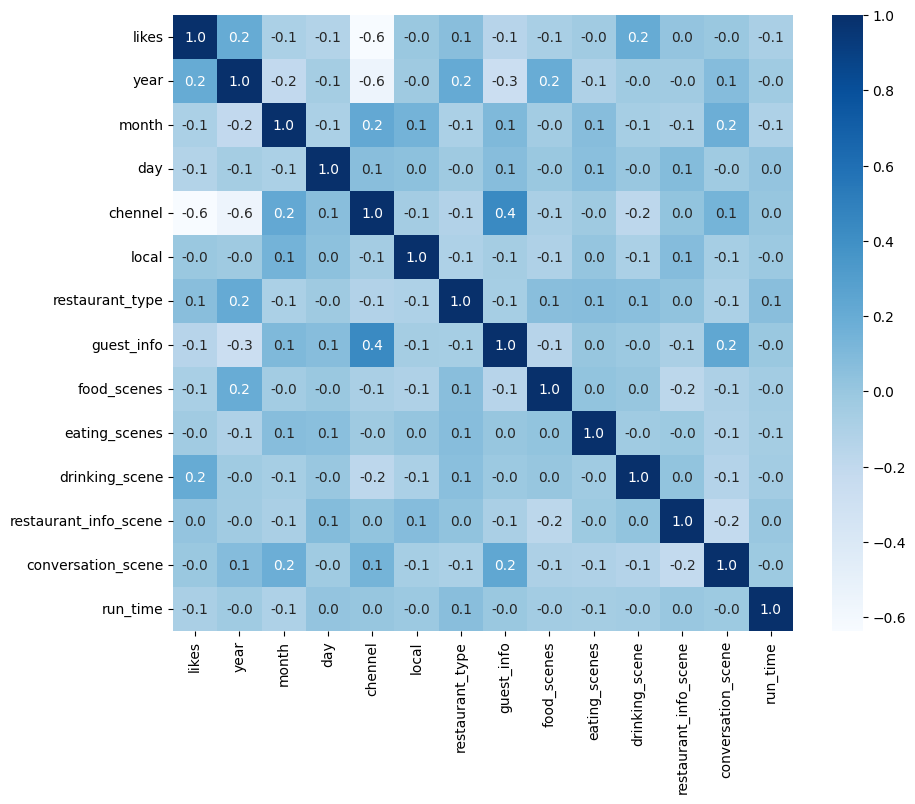

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
sns.heatmap(x.corr(),cmap='Blues',annot=True,fmt='.1f')

In [12]:
print(x.columns)

Index(['likes', 'year', 'month', 'day', 'chennel', 'local', 'restaurant_type',
       'guest_info', 'food_scenes', 'eating_scenes', 'drinking_scene',
       'restaurant_info_scene', 'conversation_scene', 'run_time'],
      dtype='object')
